In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6ba6a8fe-ab77-4f2c-8eec-07067f430144',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-28T17:23:19.238Z', 'error_code': 0, 'error_message': None, 'elapsed': 54, 'credit_count': 1, 'notice': None, 'total_count': 9876}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11791, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11791,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977432e+07,1.977432e+07,False,NaN,1,NaN,NaN,None,2024-10-28T17:21:00.000Z,68862.182033,3.018216e+10,106.4939,0.086656,1.766859,2.096324,4.996064,14.057101,4.662098,1.361703e+12,58.6671,1.446106e+12,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
1,1027,Ethereum,ETH,ethereum,9460,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204033e+08,1.204033e+08,True,NaN,2,NaN,NaN,None,2024-10-28T17:21:00.000Z,2496.036890,1.526516e+10,60.4348,-0.634429,0.054931,-6.661973,-6.548196,-2.902851,-24.042798,3.005310e+11,12.9480,3.005310e+11,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
2,825,Tether USDt,USDT,tether,101738,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203393e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.999296,5.470239e+10,69.8301,0.017394,0.053096,-0.012393,-0.080757,-0.093315,-0.062145,1.202546e+11,5.1810,1.212525e+11,None,2024-10-28T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 13:23:27.231420
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459311e+08,1.459311e+08,False,NaN,4,NaN,NaN,None,2024-10-28T17:22:00.000Z,590.757917,1.553888e+09,13.1960,-0.195149,0.694234,-1.193428,-1.616721,9.466231,3.157304,8.620992e+10,3.7153,8.620992e+10,None,2024-10-28T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.702832e+08,5.873989e+08,True,NaN,5,NaN,NaN,None,2024-10-28T17:22:00.000Z,173.673251,3.122188e+09,30.9137,-0.480943,-1.796209,5.051561,10.678011,20.451224,-2.525843,8.167562e+10,3.5199,1.020155e+11,None,2024-10-28T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
5,3408,USDC,USDC,usd-coin,22697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.465607e+10,3.465607e+10,False,NaN,6,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.999954,6.058958e+09,91.4391,0.001757,-0.000099,0.008352,-0.001984,-0.015795,-0.014771,3.465446e+10,1.4931,3.465446e+10,None,2024-10-28T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 13:23:27.231420
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.513006,7.466607e+08,52.8302,-0.257913,-0.399039,-5.940507,-17.628307,-10.268694,-18.143560,2.914482e+10,1.2557,5.130058e+10,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465573e+11,1.465573e+11,True,NaN,8,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.150373,2.142802e+09,116.6251,0.364641,5.632456,6.821125,16.494177,48.701972,19.750634,2.203834e+10,0.9498,2.203834e+10,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.647927e+10,8

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '6ba6a8fe-ab77-4f2c-8eec-07067f430144',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    df = df.append(df2)

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runned succesfully')
    sleep(60)
exit()

/var/folders/8s/k45p64zj0pl6ngfvtfqqqcbc0000gn/T/ipykernel_664/2833715261.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runned succesfully


/var/folders/8s/k45p64zj0pl6ngfvtfqqqcbc0000gn/T/ipykernel_664/2833715261.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runned succesfully


/var/folders/8s/k45p64zj0pl6ngfvtfqqqcbc0000gn/T/ipykernel_664/2833715261.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runned succesfully


/var/folders/8s/k45p64zj0pl6ngfvtfqqqcbc0000gn/T/ipykernel_664/2833715261.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runned succesfully


/var/folders/8s/k45p64zj0pl6ngfvtfqqqcbc0000gn/T/ipykernel_664/2833715261.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runned succesfully


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11791,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977432e+07,1.977432e+07,False,NaN,1,NaN,NaN,None,2024-10-28T17:21:00.000Z,68862.182033,3.018216e+10,106.4939,0.086656,1.766859,2.096324,4.996064,14.057101,4.662098,1.361703e+12,58.6671,1.446106e+12,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
1,1027,Ethereum,ETH,ethereum,9460,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204033e+08,1.204033e+08,True,NaN,2,NaN,NaN,None,2024-10-28T17:21:00.000Z,2496.036890,1.526516e+10,60.4348,-0.634429,0.054931,-6.661973,-6.548196,-2.902851,-24.042798,3.005310e+11,12.9480,3.005310e+11,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
2,825,Tether USDt,USDT,tether,101738,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203393e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.999296,5.470239e+10,69.8301,0.017394,0.053096,-0.012393,-0.080757,-0.093315,-0.062145,1.202546e+11,5.1810,1.212525e+11,None,2024-10-28T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 13:23:27.231420
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459311e+08,1.459311e+08,False,NaN,4,NaN,NaN,None,2024-10-28T17:22:00.000Z,590.757917,1.553888e+09,13.1960,-0.195149,0.694234,-1.193428,-1.616721,9.466231,3.157304,8.620992e+10,3.7153,8.620992e+10,None,2024-10-28T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.702832e+08,5.873989e+08,True,NaN,5,NaN,NaN,None,2024-10-28T17:22:00.000Z,173.673251,3.122188e+09,30.9137,-0.480943,-1.796209,5.051561,10.678011,20.451224,-2.525843,8.167562e+10,3.5199,1.020155e+11,None,2024-10-28T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
5,3408,USDC,USDC,usd-coin,22697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.465607e+10,3.465607e+10,False,NaN,6,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.999954,6.058958e+09,91.4391,0.001757,-0.000099,0.008352,-0.001984,-0.015795,-0.014771,3.465446e+10,1.4931,3.465446e+10,None,2024-10-28T17:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 13:23:27.231420
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.513006,7.466607e+08,52.8302,-0.257913,-0.399039,-5.940507,-17.628307,-10.268694,-18.143560,2.914482e+10,1.2557,5.130058e+10,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465573e+11,1.465573e+11,True,NaN,8,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.150373,2.142802e+09,116.6251,0.364641,5.632456,6.821125,16.494177,48.701972,19.750634,2.203834e+10,0.9498,2.203834e+10,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.647927e+10,8

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11791,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19774321.00000,19774321.00000,False,NaN,1,NaN,NaN,None,2024-10-28T17:21:00.000Z,68862.18203,30182157849.31990,106.49390,0.08666,1.76686,2.09632,4.99606,14.05710,4.66210,1361702892274.75610,58.66710,1446105822686.39990,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
1,1027,Ethereum,ETH,ethereum,9460,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120403276.30720,120403276.30720,True,NaN,2,NaN,NaN,None,2024-10-28T17:21:00.000Z,2496.03689,15265163261.25195,60.43480,-0.63443,0.05493,-6.66197,-6.54820,-2.90285,-24.04280,300531019308.32019,12.94800,300531019308.32001,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
2,825,Tether USDt,USDT,tether,101738,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120339320856.06236,121337925862.68210,True,NaN,3,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.99930,54702391800.72671,69.83010,0.01739,0.05310,-0.01239,-0.08076,-0.09332,-0.06214,120254552739.23712,5.18100,121252454319.37000,None,2024-10-28T17:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 13:23:27.231420
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931051.99097,145931051.99097,False,NaN,4,NaN,NaN,None,2024-10-28T17:22:00.000Z,590.75792,1553888428.82545,13.19600,-0.19515,0.69423,-1.19343,-1.61672,9.46623,3.15730,86209924238.92821,3.71530,86209924238.92999,None,2024-10-28T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470283232.74818,587398893.96722,True,NaN,5,NaN,NaN,None,2024-10-28T17:22:00.000Z,173.67325,3122187589.21489,30.91370,-0.48094,-1.79621,5.05156,10.67801,20.45122,-2.52584,81675618020.24232,3.51990,102015475671.59000,None,2024-10-28T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
5,3408,USDC,USDC,usd-coin,22697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34656067921.02180,34656067921.02180,False,NaN,6,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.99995,6058957508.97454,91.43910,0.00176,-0.00010,0.00835,-0.00198,-0.01579,-0.01477,34654457233.40424,1.49310,34654457233.40000,None,2024-10-28T17:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 13:23:27.231420
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56811862950.00000,99987068281.00000,False,NaN,7,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.51301,746660654.55489,52.83020,-0.25791,-0.39904,-5.94051,-17.62831,-10.26869,-18.14356,29144815206.56488,1.25570,51300580007.76000,None,2024-10-28T17:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 13:23:27.231420
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146557346383.70523,146557346383.70523,True,NaN,8,NaN,NaN,None,2024-10-28T17:21:00.000Z,0.15037,2142802204.12167,116.62510,0.36464,5.63246,6.82112,16.49418,48.70197,19.75063,22038339521.71336,0.94980,22038339521.71000,None,2024-10-28T17:21:00.000Z,NaN

In [9]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06998,1.73739,2.09180,4.94052,13.98420,4.52294
Ethereum,-0.58605,0.10067,-6.57921,-6.52367,-2.86729,-24.11540
Tether USDt,0.01643,0.05599,-0.00960,-0.08723,-0.09524,-0.05725
BNB,-0.20051,0.68191,-1.20290,-1.63206,9.43232,3.12506
Solana,-0.45218,-1.76985,5.10157,10.69636,20.47455,-2.50541
USDC,0.00454,-0.00113,0.00862,-0.00401,-0.01041,-0.01978
XRP,-0.25560,-0.38227,-5.94068,-17.59010,-10.30717,-18.36134
Dogecoin,0.30556,5.46607,6.69577,16.32792,48.43417,19.52352
TRON,-0.11371,-0.98612,3.28681,5.70257,1.87450,23.12077


In [10]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.06998
              quote.USD.percent_change_24h     1.73739
              quote.USD.percent_change_7d      2.09180
              quote.USD.percent_change_30d     4.94052
              quote.USD.percent_change_60d    13.98420
              quote.USD.percent_change_90d     4.52294
Ethereum      quote.USD.percent_change_1h     -0.58605
              quote.USD.percent_change_24h     0.10067
              quote.USD.percent_change_7d     -6.57921
              quote.USD.percent_change_30d    -6.52367
              quote.USD.percent_change_60d    -2.86729
              quote.USD.percent_change_90d   -24.11540
Tether USDt   quote.USD.percent_change_1h      0.01643
              quote.USD.percent_change_24h     0.05599
              quote.USD.percent_change_7d     -0.00960
              quote.USD.percent_change_30d    -0.08723
              quote.USD.percent_change_60d    -0.09524
              quote.US

In [11]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.06998
             quote.USD.percent_change_24h   1.73739
             quote.USD.percent_change_7d    2.09180
             quote.USD.percent_change_30d   4.94052
             quote.USD.percent_change_60d  13.98420
             quote.USD.percent_change_90d   4.52294
Ethereum     quote.USD.percent_change_1h   -0.58605
             quote.USD.percent_change_24h   0.10067
             quote.USD.percent_change_7d   -6.57921
             quote.USD.percent_change_30d  -6.52367
             quote.USD.percent_change_60d  -2.86729
             quote.USD.percent_change_90d -24.11540
Tether USDt  quote.USD.percent_change_1h    0.01643
             quote.USD.percent_change_24h   0.05599
             quote.USD.percent_change_7d   -0.00960
             quote.USD.percent_change_30d  -0.08723
             quote.USD.percent_change_60d  -0.09524
             quote.USD.percent_change_90d  -0.05725
BNB          quote.USD.percent_change_1h   -0.20051
             quote.USD.percent_change_24h   0.68191
             quote.USD.percent_change_7d   -1.20290
             quote.USD.percent_change_30d  -1.63206
             quote.USD.percent_change_60d   9.43232
             quote.USD.percent_change_90d   3.12506
Solana       quote.USD.percent_change_1h   -0.45218
             quote.USD.percent_change_24h  -1.76985
             quote.USD.percent_change_7d    5.10157
             quote.USD.percent_change_30d  10.69636
             quote.USD.percent_change_60d  20.47455
             quote.USD.percent_change_90d  -2.50541
USDC         quote.USD.percent_change_1h    0.00454
             quote.USD.percent_change_24h  -0.00113
             quote.USD.percent_change_7d    0.00862
             quote.USD.percent_change_30d  -0.00401
             quote.USD.percent_change_60d  -0.01041
             quote.USD.percent_change_90d  -0.01978
XRP          quote.USD.percent_change_1h   -0.25560
             quote.USD.percent_change_24h  -0.38227
             quote.USD.percent_change_7d   -5.94068
             quote.USD.percent_change_30d -17.59010
             quote.USD.percent_change_60d -10.30717
             quote.USD.percent_change_90d -18.36134
Dogecoin     quote.USD.percent_change_1h    0.30556
             quote.USD.percent_change_24h   5.46607
             quote.USD.percent_change_7d    6.69577
             quote.USD.percent_change_30d  16.32792
             quote.USD.percent_change_60d  48.43417
             quote.USD.percent_change_90d  19.52352
TRON         quote.USD.percent_change_1h   -0.11371
             quote.USD.percent_change_24h  -0.98612
             quote.USD.percent_change_7d    3.28681
             quote.USD.percent_change_30d   5.70257
             quote.USD.percent_change_60d   1.87450
             quote.USD.percent_change_90d  23.12077
Toncoin      quote.USD.percent_change_1h   -0.98097
             quote.USD.percent_change_24h   0.66964
             quote.USD.percent_change_7d   -4.60128
             quote.USD.percent_change_30d -15.01188
             quote.USD.percent_change_60d  -9.15454
             quote.USD.percent_change_90d -25.52898
Cardano      quote.USD.percent_change_1h   -0.49897
             quote.USD.percent_change_24h  -2.23244
             quote.USD.percent_change_7d   -6.59146
             quote.USD.percent_change_30d -17.00483
             quote.USD.percent_change_60d  -8.31799
             quote.USD.percent_change_90d -17.17078
Avalanche    quote.USD.percent_change_1h   -0.84520
             quote.USD.percent_change_24h  -0.99247
             quote.USD.percent_change_7d   -7.99862
             quote.USD.percent_change_30d -13.09834
             quote.USD.percent_change_60d   5.82585
             quote.USD.percent_change_90d  -3.99343
Shiba Inu    quote.USD.percent_change_1h   -0.50320
             quote.USD.percent_change_24h  -0.26341
             quote.USD.percent_change_7d   -6.53008
             quote.USD.percent_change_30d

In [14]:
type(df5)

pandas.core.frame.DataFrame

In [17]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.06998
1,Bitcoin,quote.USD.percent_change_24h,1.73739
2,Bitcoin,quote.USD.percent_change_7d,2.09180
3,Bitcoin,quote.USD.percent_change_30d,4.94052
4,Bitcoin,quote.USD.percent_change_60d,13.98420
5,Bitcoin,quote.USD.percent_change_90d,4.52294
6,Ethereum,quote.USD.percent_change_1h,-0.58605
7,Ethereum,quote.USD.percent_change_24h,0.10067
8,Ethereum,quote.USD.percent_change_7d,-6.57921
9,Ethereum,quote.USD.percent_change_30d,-6.52367


In [19]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06998
1,Bitcoin,quote.USD.percent_change_24h,1.73739
2,Bitcoin,quote.USD.percent_change_7d,2.09180
3,Bitcoin,quote.USD.percent_change_30d,4.94052
4,Bitcoin,quote.USD.percent_change_60d,13.98420
5,Bitcoin,quote.USD.percent_change_90d,4.52294
6,Ethereum,quote.USD.percent_change_1h,-0.58605
7,Ethereum,quote.USD.percent_change_24h,0.10067
8,Ethereum,quote.USD.percent_change_7d,-6.57921
9,Ethereum,quote.USD.percent_change_30d,-6.52367


In [25]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,0.06998
1,Bitcoin,24h,1.73739
2,Bitcoin,7d,2.09180
3,Bitcoin,30d,4.94052
4,Bitcoin,60d,13.98420
5,Bitcoin,90d,4.52294
6,Ethereum,1h,-0.58605
7,Ethereum,24h,0.10067
8,Ethereum,7d,-6.57921
9,Ethereum,30d,-6.52367


In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt

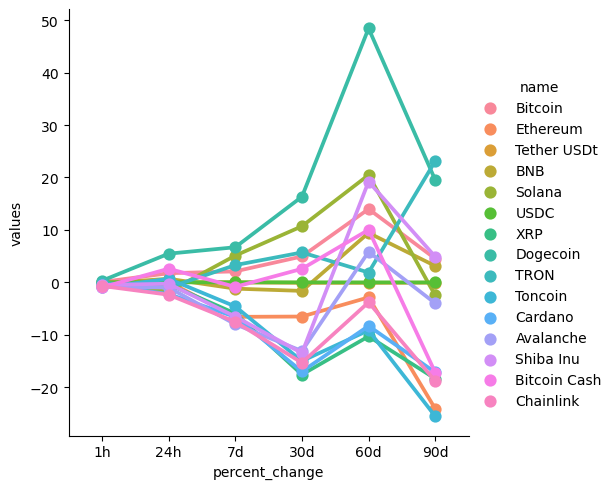

In [27]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [29]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,68862.18203,2024-10-28 13:23:27.231420
0,Bitcoin,68862.18203,2024-10-28 13:23:34.627139
0,Bitcoin,68855.94761,2024-10-28 13:24:34.762681
0,Bitcoin,68851.87218,2024-10-28 13:25:35.047224
0,Bitcoin,68825.56825,2024-10-28 13:26:35.300069
0,Bitcoin,68832.97070,2024-10-28 13:27:35.463256


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

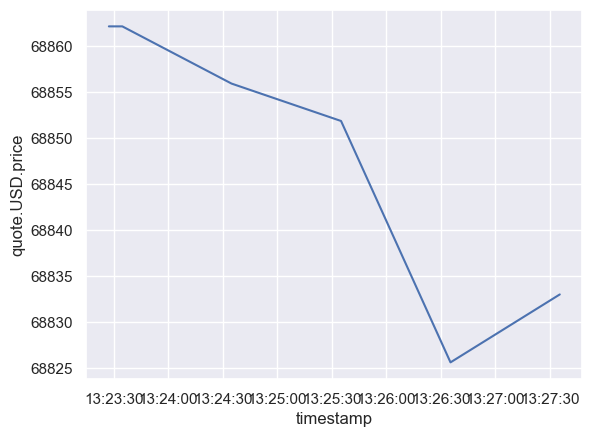

In [31]:
sns.set_theme(style="darkgrid")

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)